# Visualizing Data w/ Pandas, Matplotlib and Seaborn
---
**Author:** Robert Kelley  
**Version:** 1.0  
**Semester:** Spring 2021  
**Summary:**  

I developed this notebook to so we could walk through the approaches for visualizing data.  The dataset for this notebook was obtained from: https://github.com/allisonhorst/palmerpenguins.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

## Why is Visualization Important?

In [2]:
anscombe = sns.load_dataset("anscombe")

In [3]:
I = anscombe.query("dataset=='I'")
II = anscombe.query("dataset=='II'")
III = anscombe.query("dataset=='III'")
IV = anscombe.query("dataset=='IV'")


In [4]:
print(I.mean(),  II.mean(), III.mean(), IV.mean(),)

x    9.000000
y    7.500909
dtype: float64 x    9.000000
y    7.500909
dtype: float64 x    9.0
y    7.5
dtype: float64 x    9.000000
y    7.500909
dtype: float64


Reminder - you can get info about any function with the question mark syntax.

In [5]:
#plt.scatter?

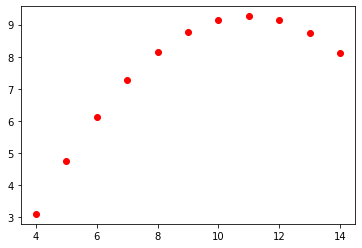

In [6]:
plt.scatter(II.x, II.y, color='red', marker='o')

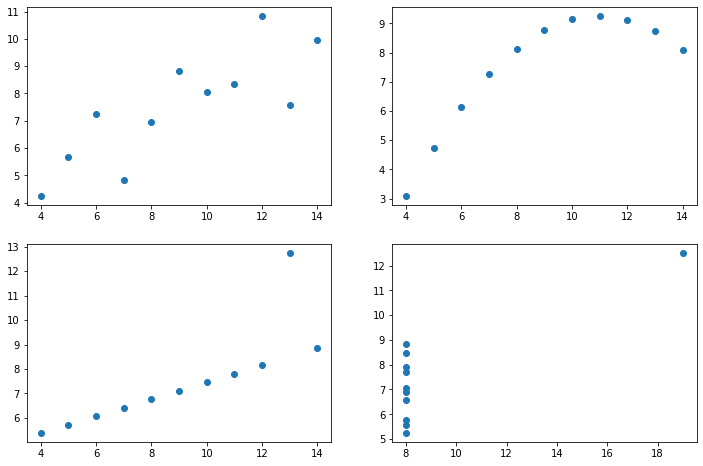

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax1.scatter(I.x,I.y)
ax1.xlabel = 'X'
ax2= fig.add_subplot(222)
ax2.scatter(II.x,II.y)
ax3= fig.add_subplot(223)
ax3.scatter(III.x,III.y)
ax4= fig.add_subplot(224)
ax4.scatter(IV.x,IV.y)

## Working with Other Data Sets
Seaborn provides several data sets you can learn with. You list them with get_dataset_names().

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

And you can load them as follows:

In [9]:
df = sns.load_dataset('flights')

In [10]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Line Charts

In [11]:
fmri = sns.load_dataset('fmri')

In [12]:
fmri.sample(5)

,subject,timepoint,event,region,signal
353,s4,6,stim,frontal,0.410661
665,s12,8,cue,parietal,-0.017423
795,s1,16,cue,frontal,0.004579
394,s3,9,stim,frontal,0.127789
997,s9,13,cue,frontal,0.020074


In [13]:
s13 = fmri.query("subject=='s13' and region=='frontal' and event=='stim'")
s13 = s13.sort_values(by='timepoint')
s13.index = s13.timepoint
s1 = fmri.query("subject=='s1' and region=='frontal' and event=='stim'")
s1 = s1.sort_values(by='timepoint')
s1.index = s1.timepoint

In [14]:
s1

,subject,timepoint,event,region,signal
timepoint,,,,,
0,s1,0,stim,frontal,-0.046049
1,s1,1,stim,frontal,-0.060273
2,s1,2,stim,frontal,-0.037520
3,s1,3,stim,frontal,0.057598
4,s1,4,stim,frontal,0.202123
5,s1,5,stim,frontal,0.315860
6,s1,6,stim,frontal,0.321335
7,s1,7,stim,frontal,0.204943
8,s1,8,stim,frontal,0.036685


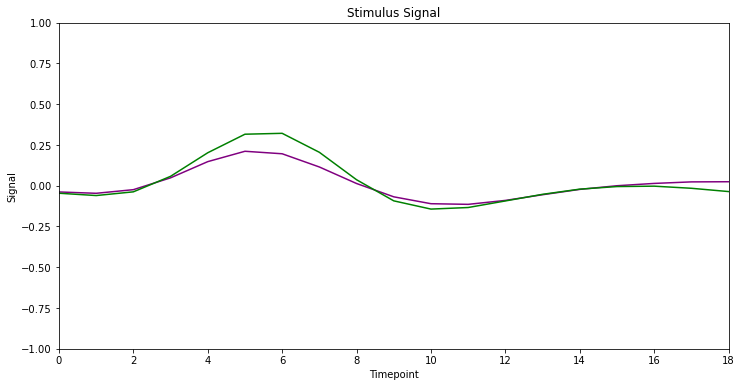

In [15]:
fig = plt.figure(figsize=(12,6))
plt.plot(s13.signal, color='purple')
plt.title('Stimulus Signal')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.axis([0,18,-1,1])
plt.plot(s1.signal, color='green')

## Bar Charts

In [16]:
mpg = sns.load_dataset('mpg')

In [17]:
mpg.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
185,26.0,4,98.0,79.0,2255,17.7,76,usa,dodge colt
206,26.5,4,140.0,72.0,2565,13.6,76,usa,ford pinto
189,15.5,8,304.0,120.0,3962,13.9,76,usa,amc matador
130,26.0,4,122.0,80.0,2451,16.5,74,usa,ford pinto
340,25.8,4,156.0,92.0,2620,14.4,81,usa,dodge aries wagon (sw)
174,18.0,6,171.0,97.0,2984,14.5,75,usa,ford pinto
63,14.0,8,400.0,175.0,4385,12.0,72,usa,pontiac catalina
182,28.0,4,107.0,86.0,2464,15.5,76,europe,fiat 131
149,24.0,4,120.0,97.0,2489,15.0,74,japan,honda civic
377,31.0,4,91.0,68.0,1970,17.6,82,japan,mazda glc custom


In [18]:
cylinders = mpg.cylinders.groupby(mpg.cylinders).count()

In [19]:
cylinders

cylinders
3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

<BarContainer object of 5 artists>

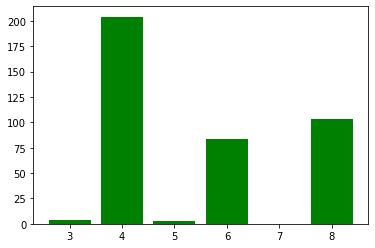

In [20]:
plt.bar(cylinders.index,cylinders.values, color='green')

In [21]:
cylinders = cylinders.sort_values()

In [22]:
cylinders.sort_index()

cylinders
3      4
4    204
5      3
6     84
8    103
Name: cylinders, dtype: int64

Text(0, 0.5, 'Number of Cylinders')

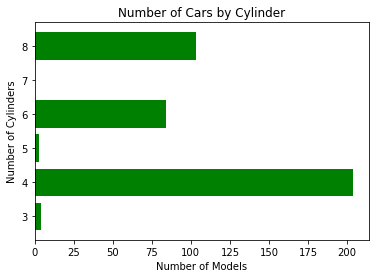

In [23]:
plt.barh(cylinders.index, cylinders.values, color='green')
plt.title('Number of Cars by Cylinder')
plt.xlabel('Number of Models')
plt.ylabel('Number of Cylinders')

<AxesSubplot:ylabel='Number of Cylinders'>

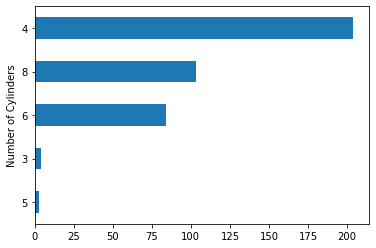

In [24]:
cylinders.sort_values().plot(kind='barh',xlabel='Number of Cylinders', ylabel='Number of Vehicles')

In [25]:
cylinders.sort_values().plot

## Box/Whisker Plots

{'whiskers': [<matplotlib.lines.Line2D at 0x201bef12b80>,
 'caps': [<matplotlib.lines.Line2D at 0x201bef22280>,
 'boxes': [<matplotlib.lines.Line2D at 0x201bef12820>],
 'medians': [<matplotlib.lines.Line2D at 0x201bef22940>],
 'fliers': [<matplotlib.lines.Line2D at 0x201bef22ca0>],
 'means': []}

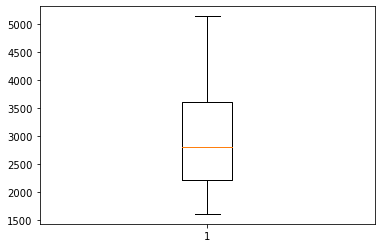

In [26]:
plt.boxplot(mpg.weight)

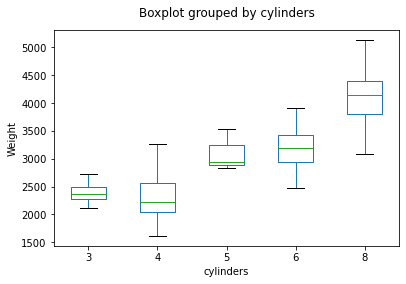

In [27]:
ax1 = mpg.boxplot(column='weight', by='cylinders') #creates reference to the plot AXIS object
ax1.set_title('')
ax1.set_ylabel('Weight')
ax1.grid(False)

## Histograms

In [28]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

(array([ 3.,  1.,  6.,  1., 10., 20., 13., 23., 41., 39., 32., 55., 33.,
        30., 22., 18., 19.,  9.,  7.,  5.,  5.,  2.,  0.,  2.,  2.]),
 array([ 8.   ,  8.672,  9.344, 10.016, 10.688, 11.36 , 12.032, 12.704,
        13.376, 14.048, 14.72 , 15.392, 16.064, 16.736, 17.408, 18.08 ,
        18.752, 19.424, 20.096, 20.768, 21.44 , 22.112, 22.784, 23.456,
        24.128, 24.8  ]),
 <BarContainer object of 25 artists>)

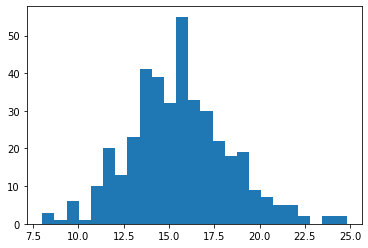

In [29]:
plt.hist(mpg.acceleration, bins=25)

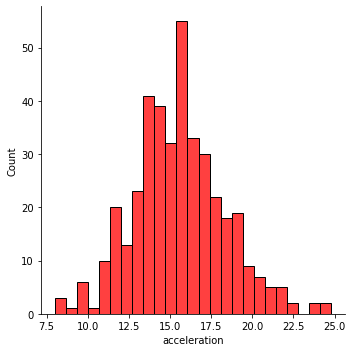

In [30]:
sns.displot(mpg.acceleration, color='red', bins=25)

## Kernel Density Plots

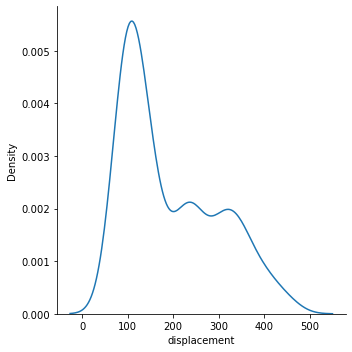

In [86]:
sns.displot(mpg.displacement,kind='kde')

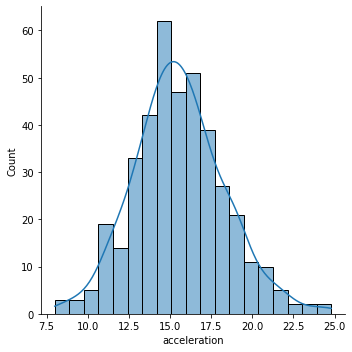

In [88]:
sns.displot(mpg.acceleration, kde='true')

## Heatmaps

In [89]:
flights = sns.load_dataset('flights')

In [90]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [92]:
flights = flights.pivot("month","year","passengers")

In [94]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

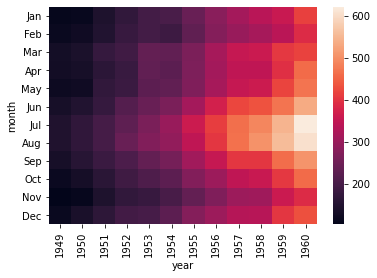

In [93]:
sns.heatmap(flights)

## Visualizing the Penguin Data

In [95]:
p = pd.read_csv('processed_penguins.csv')

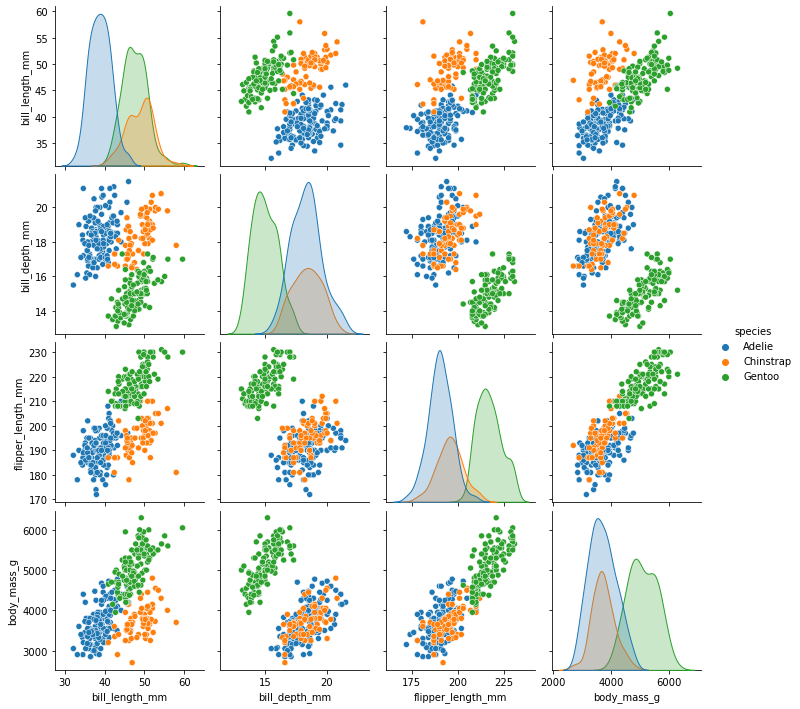

In [97]:
sns.pairplot(p[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g', 'species']], hue='species')

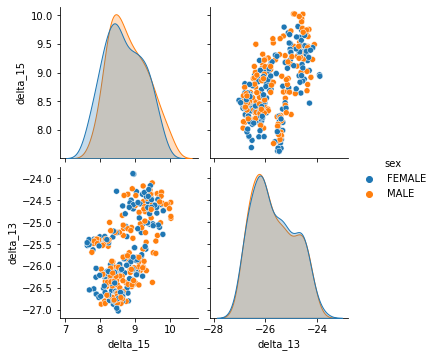

In [99]:
sns.pairplot(p[['delta_15', 'delta_13', 'island', 'species','sex']], hue='sex')

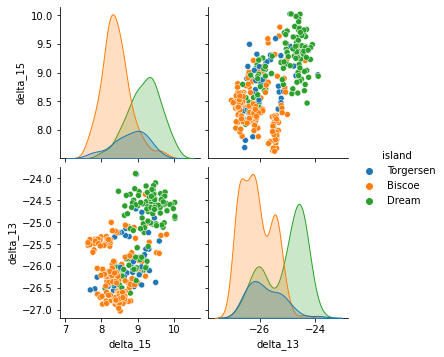

In [100]:
sns.pairplot(p[['delta_15', 'delta_13', 'island', 'species','sex']], hue='island')

{'whiskers': [<matplotlib.lines.Line2D at 0x201c8be7820>,
 'caps': [<matplotlib.lines.Line2D at 0x201c8be7ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201c8be74c0>],
 'medians': [<matplotlib.lines.Line2D at 0x201c8bf55e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x201c8bf5940>],
 'means': []}

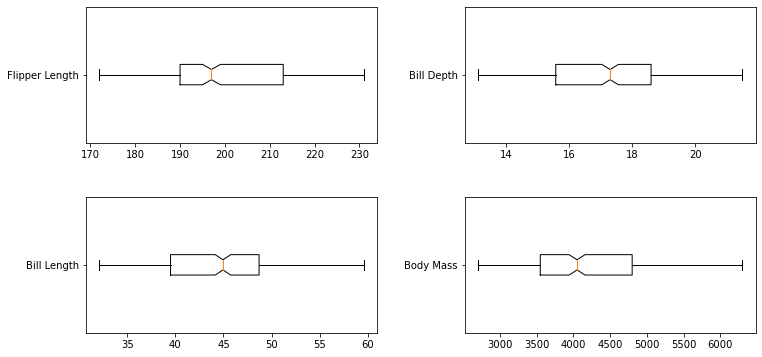

In [116]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = fig.add_subplot(221)
ax1.boxplot(p.flipper_length_mm, notch=True, labels=['Flipper Length'], vert=False)
ax2 = fig.add_subplot(222)
ax2.boxplot(p.bill_depth_mm, notch=True,labels=['Bill Depth'], vert=False)
ax3 = fig.add_subplot(223)
ax3.boxplot(p.bill_length_mm, notch=True, labels=['Bill Length'], vert=False)
ax4 = fig.add_subplot(224)
ax4.boxplot(p.body_mass_g, notch=True, labels=['Body Mass'], vert=False)

<AxesSubplot:title={'center':'Number of each species'}, ylabel='species'>

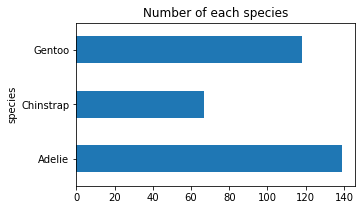

In [117]:
fig = plt.figure(figsize=(5,3))
p.species.groupby(p.species).count().plot(kind='barh', title='Number of each species')

<AxesSubplot:title={'center':'Number of males/females'}, ylabel='sex'>

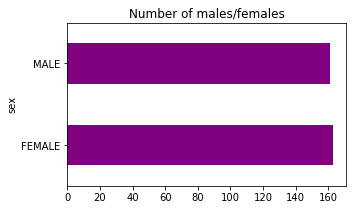

In [112]:
fig = plt.figure(figsize=(5,3))
p.sex.groupby(p.sex).count().plot(kind='barh', color='purple', title="Number of males/females")

<AxesSubplot:xlabel='study_day', ylabel='Number of Penguins Observed'>

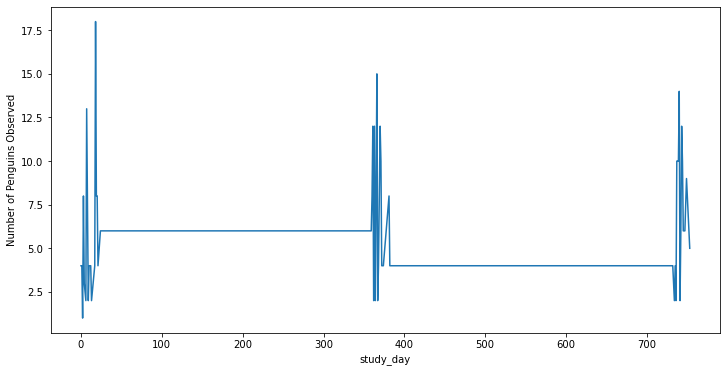

In [113]:
fig = plt.figure(figsize=(12,6))
p.study_day.groupby(p.study_day).count().plot(kind='line', ylabel='Number of Penguins Observed')

In [118]:
observations = p['study_day'].groupby(p.study_day).count()

In [120]:
type(observations)

pandas.core.series.Series

In [124]:
observations[1:10]

study_day
1      4
2      1
3      8
4      3
6      2
7     13
9      2
10     4
12     4
Name: study_day, dtype: int64

<AxesSubplot:title={'center':'Observation Period 3'}, xlabel='Study Day', ylabel='Number of Penguins Observed'>

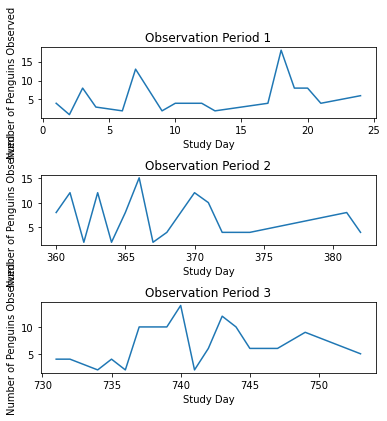

In [128]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(hspace=0.8)
ax1 = fig.add_subplot(311)
observations[1:17].plot(kind='line', ylabel='Number of Penguins Observed', xlabel="Study Day", 
                        legend=False, title='Observation Period 1', ax=ax1)
ax2 = fig.add_subplot(312)
observations[18:33].plot(kind='line', ylabel='Number of Penguins Observed', xlabel="Study Day", 
                         legend=False, title='Observation Period 2', ax=ax2)
ax3 = fig.add_subplot(313)
observations[33:].plot(kind='line', ylabel='Number of Penguins Observed', xlabel="Study Day", 
                       legend=False, title='Observation Period 3', ax=ax3)
